# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura da base
df = pd.read_csv('SINASC_RO_2019.csv')

# Visualizar as 5 primeiras linhas
df.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [15]:
def categoriza_apgar5(valor):
    if pd.isnull(valor):
        return 'Ignorado'
    elif valor <= 3:
        return 'asfixia grave'
    elif valor <= 5:
        return 'asfixia moderada'
    elif valor <= 7:
        return 'asfixia leve'
    elif valor <= 10:
        return 'normal'
    else:
        return 'Inválido'

df['APGAR5_cat'] = df['APGAR5'].apply(categoriza_apgar5)

# Conferir resultado
df[['APGAR5', 'APGAR5_cat']].head()


,APGAR5,APGAR5_cat
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [16]:
#erro só funciona com sns.catplot() N ENTENDI O MOTIVO MAIS TA BOM
#plt.figure(figsize=(14, 6))
#sns.countplot(data=df, x='APGAR5_cat', hue='SEXO', col='GESTACAO',
#              palette='Set2', order=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])
#plt.suptitle('Distribuição de APGAR5 por Sexo e Tempo de Gestação', y=1.05)
#plt.tight_layout()
#plt.show()


Text(0.5, 0.98, 'Distribuição de APGAR5 por Sexo e Tempo de Gestação')

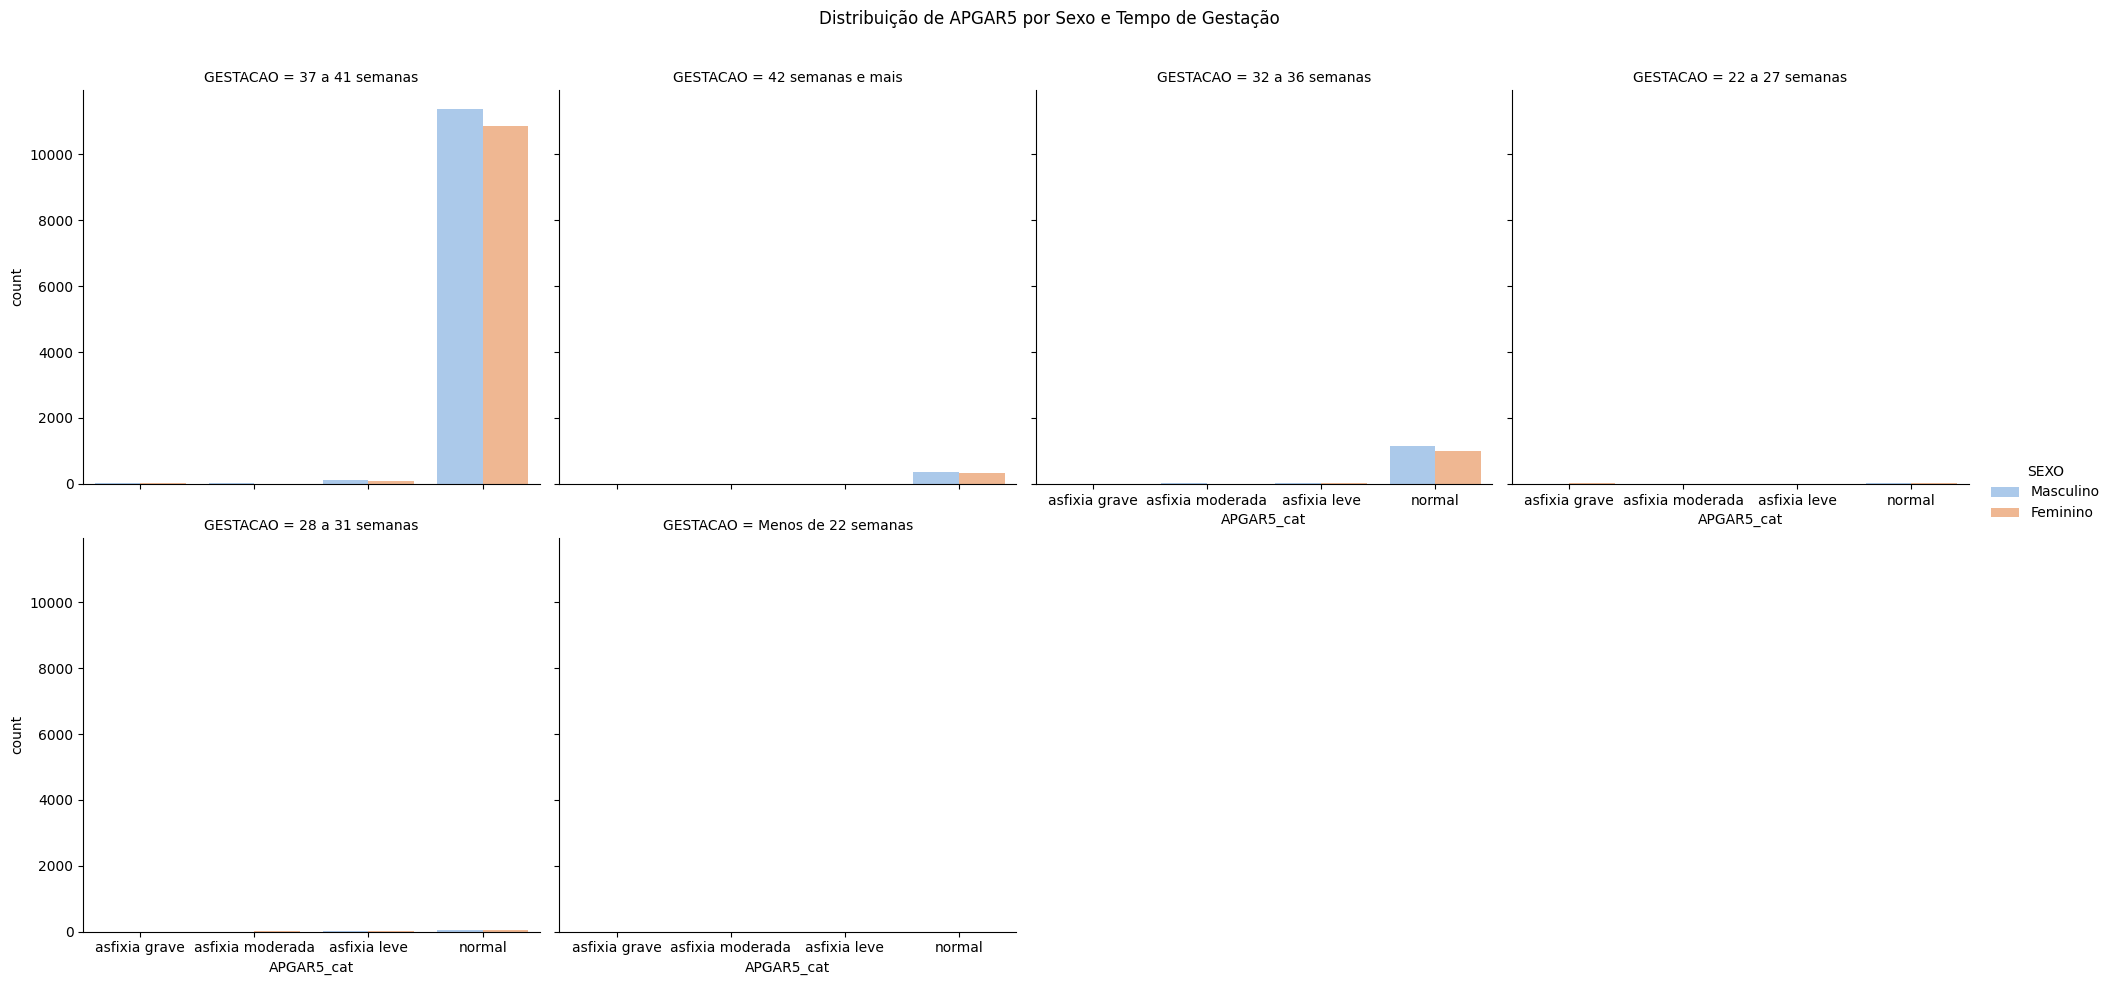

In [17]:
#TREM BUGADO AFF
g = sns.catplot(data=df, x='APGAR5_cat', hue='SEXO', col='GESTACAO',
                kind='count', col_wrap=4, palette='pastel',
                order=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribuição de APGAR5 por Sexo e Tempo de Gestação')


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [18]:
tab_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5_cat'])
tab_cruzada


APGAR5_cat,Ignorado,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,,
22 a 27 semanas,1,21,12,1,51
28 a 31 semanas,3,3,18,12,129
32 a 36 semanas,15,8,73,19,2134
37 a 41 semanas,66,33,196,28,22266
42 semanas e mais,2,1,6,1,690
Menos de 22 semanas,0,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [19]:
tab_percentual = tab_cruzada.div(tab_cruzada.sum(axis=1), axis=0) * 100
tab_percentual.round(2)


APGAR5_cat,Ignorado,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,,
22 a 27 semanas,1.16,24.42,13.95,1.16,59.30
28 a 31 semanas,1.82,1.82,10.91,7.27,78.18
32 a 36 semanas,0.67,0.36,3.25,0.84,94.89
37 a 41 semanas,0.29,0.15,0.87,0.12,98.57
42 semanas e mais,0.29,0.14,0.86,0.14,98.57
Menos de 22 semanas,0.00,28.57,14.29,0.00,57.14


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

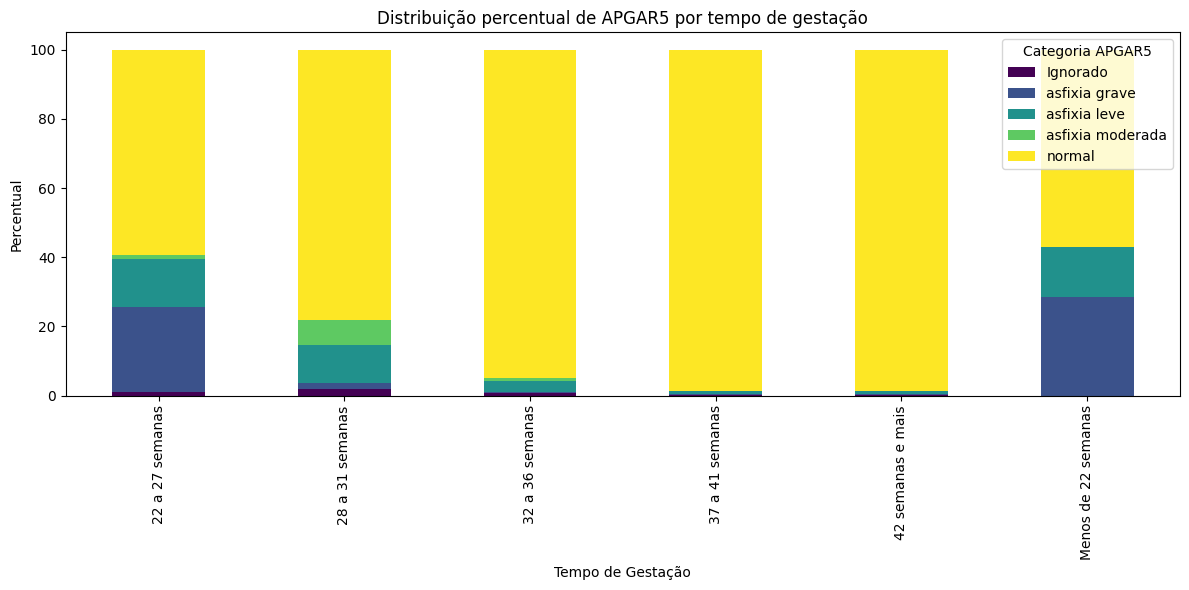

In [20]:
tab_percentual.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribuição percentual de APGAR5 por tempo de gestação')
plt.ylabel('Percentual')
plt.xlabel('Tempo de Gestação')
plt.legend(title='Categoria APGAR5')
plt.tight_layout()
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<ipython-input-21-e77c1d1263b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='APGAR5_cat', y='PESO', palette='coolwarm', order=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])


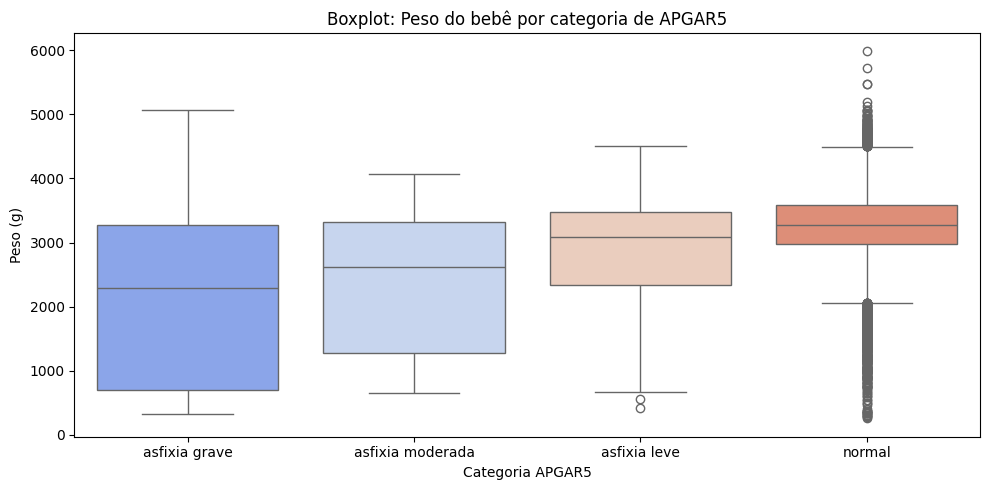

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='APGAR5_cat', y='PESO', palette='coolwarm', order=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])
plt.title('Boxplot: Peso do bebê por categoria de APGAR5')
plt.ylabel('Peso (g)')
plt.xlabel('Categoria APGAR5')
plt.tight_layout()
plt.show()


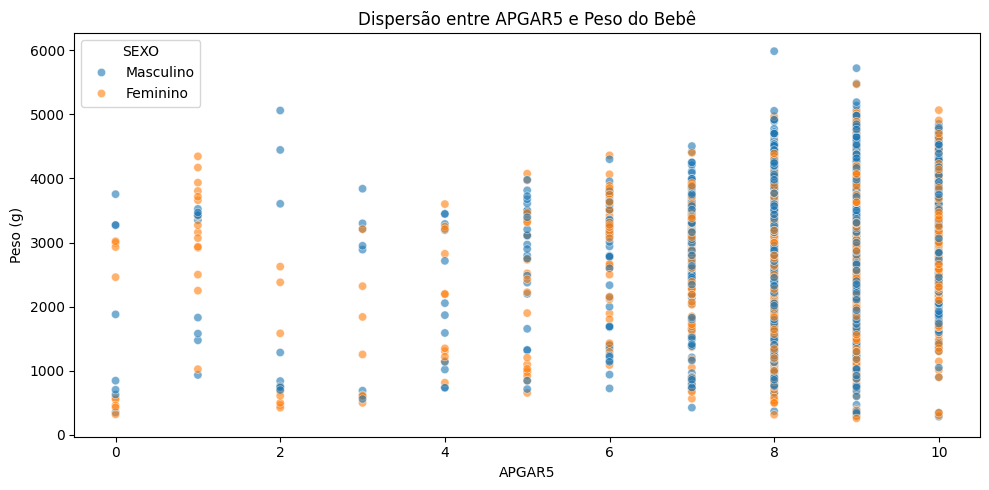

In [22]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='APGAR5', y='PESO', hue='SEXO', alpha=0.6)
plt.title('Dispersão entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso (g)')
plt.tight_layout()
plt.show()
